In [9]:
import pandas as pd

order_report = pd.read_csv('Order Report.csv')
courier_invoice =  pd.read_csv('Invoice.csv')
pincode_mapping =  pd.read_csv('pincodes.csv')
sku_master =  pd.read_csv('SKU Master.csv')
courier_company_rates=  pd.read_csv('Courier Company - Rates.csv')

In [17]:
print("Order Report :")
print(order_report.head())
print("courier_invoice :")
print(courier_invoice.head())
print("pincode_mapping :")
print(pincode_mapping.head())
print("sku_master :")
print(sku_master.head())
print("courier_company_rates :")
print(courier_company_rates.head())

Order Report :
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN
courier_invoice :
        AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
0  1091117222124  2001806232            1.30             121003   
1  1091117222194  2001806273            1.00             121003   
2  1091117222931  2001806408            2.50             121003   
3  1091117223244  2001806458            1.00             121003   
4  1091117229345  2001807012            0.15             121003   

   Customer Pincode Zone Type of Shipment  Billing Amount (Rs.)  
0            507101    d  Forward charges                 135.0  
1            486886    d  Forw

In [24]:
# Check for missing values

print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())

print("\nMissing values in Website courier_invoice:")
print(invoice.isnull().sum())

print("\nMissing values in Website pincode_mapping:")
print(pincode_mapping.isnull().sum())

print("\nMissing values in Website sku_master:")
print(sku_master.isnull().sum())

print("\nMissing values in Website courier_company_rates:")
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in Website courier_invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in Website pincode_mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Website sku_master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Website courier_company_rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_add

In [30]:
pincode_mapping = pincode_mapping.drop(columns = [ "Unnamed: 3","Unnamed: 4"])
sku_master = sku_master.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [37]:
# Merge the Order Report and SKU Master based on SKU

merged_data = pd.merge(order_report,sku_master,on="SKU")
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001827036  8904223819093        1.0         150
2     2001827036  8904223819109        1.0         100
3     2001827036  8904223818430        1.0         165
4     2001827036  8904223819277        1.0         350


In [40]:
merged_data = merged_data.rename(columns = {'ExternOrderNo' : 'Order ID'})
print(merged_data.head())

     Order ID            SKU  Order Qty  Weight (g)
0  2001827036  8904223818706        1.0         127
1  2001827036  8904223819093        1.0         150
2  2001827036  8904223819109        1.0         100
3  2001827036  8904223818430        1.0         165
4  2001827036  8904223819277        1.0         350


In [42]:
# Now let’s merge the courier invoice and pincode mapping dataset:

abc_courier = pincode_mapping.drop_duplicates(subset = ['Customer Pincode'])
courier_abc = courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincode = courier_abc.merge(abc_courier,on='Customer Pincode')
print(pincode.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


In [43]:
# let’s merge the pin codes with the main dataframe:

merged2 = merged_data.merge(pincode , on = 'Order ID')
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Zone  
0  Forward charges             121003    e  
1  Forward charges             121003    e  
2  Forward charges             121003    e  
3  Forward charges             121003    e  
4  Forward charges             121003    e  


In [54]:
# Now let’s calculate the weight in kilograms by dividing the ‘Weight (g)’ column in the ‘merged2’ DataFrame by 1000

merged2['Weights (Kgs)']  = merged2[['Weight (g)']]/1000
print(merged2.head())



     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Zone  Weights (Kgs)  
0  Forward charges             121003    e          0.127  
1  Forward charges             121003    e          0.150  
2  Forward charges             121003    e          0.100  
3  Forward charges             121003    e          0.165  
4  Forward charges             121003    e          0.350  


In [57]:
#Now let’s calculate the weight slabs:

def weight_slab(weight) :
    i = round(weight % 1 ,1)
    if i==0.0:
        return weight
    elif i >0.5 :
        return int(weight) + 1.0
    else :
        return int(weight) + 0.5

merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company'] = courier_invoice['Charged Weight'].apply(weight_slab)

In [58]:
# let’s rename the columns to prepare the desired dataframe:

courier_invoice = courier_invoice.rename(columns = {'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per ABC'})

print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per ABC  
0                     0.5  
1                 

In [66]:
# Now let’s calculate the expected charges:


total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed  = courier_company_rates.at[0,fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0,fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed =  courier_company_rates.at[0 ,rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0,fwd_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
       additional_weight = max(0,(weight_slab - 0.5)/0.5)
       total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges' :
       additional_weight = max(0,(weight_slab - 0.5)/0.5)
       total_expected_charge.append(fwd_fixed + additional_weight + (fwd_additional + rto_additional))
    else:
       total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                 

In [68]:
# let’s merge it with the courier invoice to display the final dataframe

merged_output = merged2.merge(courier_invoice, on = 'Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per ABC  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weights (Kgs)  Weight Slab As Per ABC  Expected Charge as per ABC  \
0          0.127                     0.5                

In [73]:
# Now let’s calculate the differences in charges and expected charges for each order:

df_diff = merged_output

df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())


     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


In [77]:
# Now let’s summarize the accuracy of B2B courier charges based on the charged prices and expected prices:

# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_under_charged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category

amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0].sum())
amount_undercharged = abs(df_new[df_new['Difference (Rs.)'] <0].sum())
amount_correctly_charged = abs(df_new[df_new['Difference (Rs.)'] == 0].sum())

# Create a new DataFrame for the summary

summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_under_charged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)
print(df_summary)

                                         Description  Count  \
0  Total Orders where ABC has been correctly charged     12   
1        Total Orders where ABC has been overcharged    373   
2       Total Orders where ABC has been undercharged     16   

                                        Amount (Rs.)  
0  Order ID                      2.402169e+10
Dif...  
1  Order ID                      7.466755e+11
Dif...  
2  Order ID                      3.202900e+10
Dif...  


In [86]:
pip install plotly


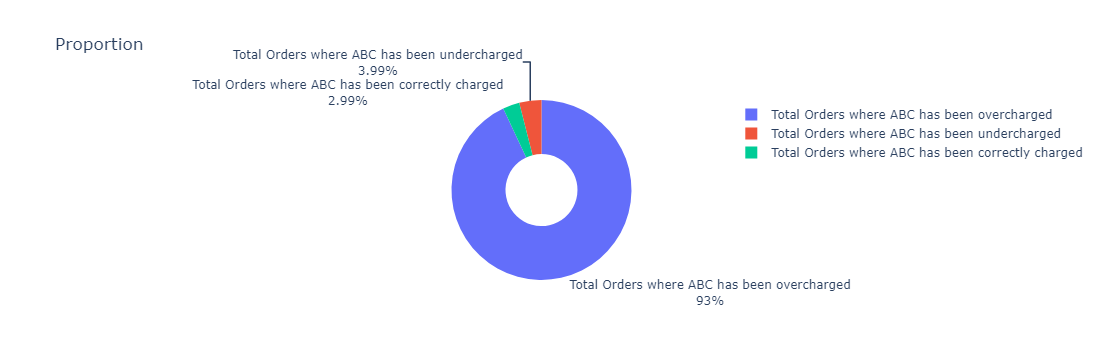

In [85]:

import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion')

fig.show()
